# COCO Whole Body
anns: https://github.com/jin-s13/COCO-WholeBody/tree/master?tab=readme-ov-file

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import os
import requests

In [3]:
dataDir='./data/msCoco/'
dataType='val2017'
catDir = dataDir+'person/'
annFile='{}annotations/coco_wholebody_val_v1.0.json'.format(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.11s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [6]:

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [7]:
coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])

[{'license': 3,
  'file_name': '000000235836.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000235836.jpg',
  'height': 640,
  'width': 427,
  'date_captured': '2013-11-23 00:56:12',
  'flickr_url': 'http://farm8.staticflickr.com/7196/7125669095_6e2cf1eaa8_z.jpg',
  'id': 235836}]

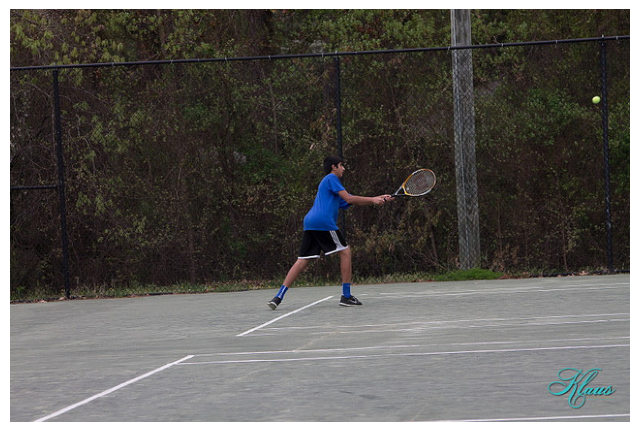

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

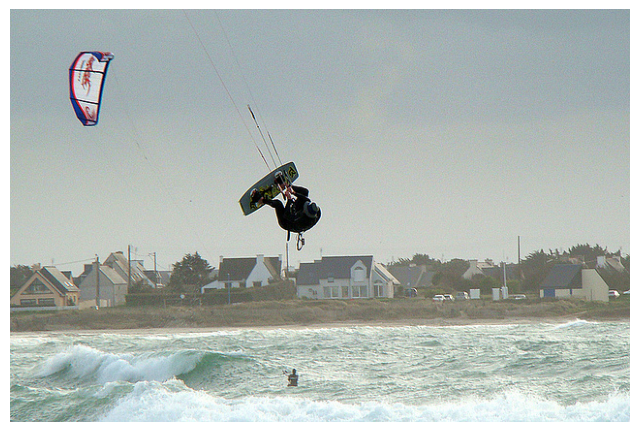

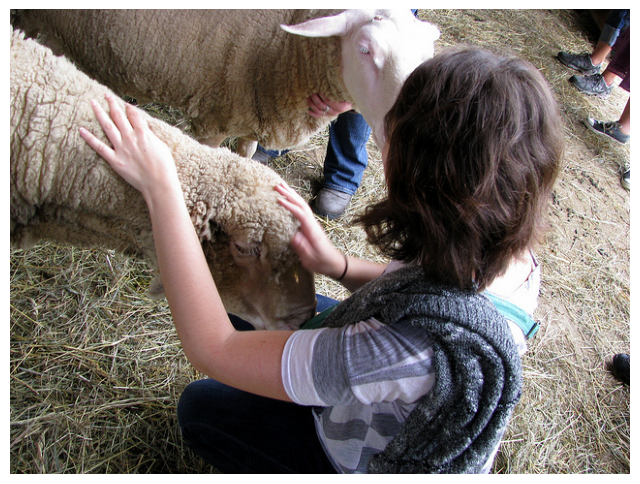

In [18]:
for id in imgIds[:2]:
    img = coco.loadImgs(id)[0]
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()

In [11]:
def download_images():
    for id in imgIds:
        img = coco.loadImgs(id)[0]
        url = img['coco_url']
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()

            with open(catDir + img['file_name'], 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"Image saved successfully at {catDir + img['file_name']}")

        except requests.exceptions.RequestException as e:
            print(f"Error downloading image from {url}: {e}")


13

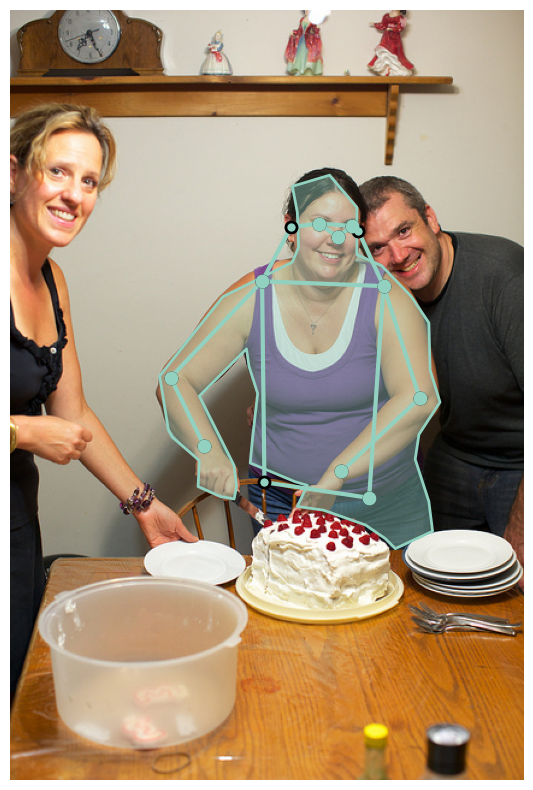

In [22]:
img = coco.loadImgs(568195)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=568195, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns([anns[0]])
anns[0].keys()
anns[0]['num_keypoints']

In [23]:
anns[0].keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id', 'face_box', 'lefthand_box', 'righthand_box', 'lefthand_kpts', 'righthand_kpts', 'face_kpts', 'face_valid', 'lefthand_valid', 'righthand_valid', 'foot_valid', 'foot_kpts'])

In [95]:
import cv2
img = coco.loadImgs(551439)[0]
url = img['coco_url']
I = io.imread(url)
annIds = coco.getAnnIds(imgIds=551439, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)


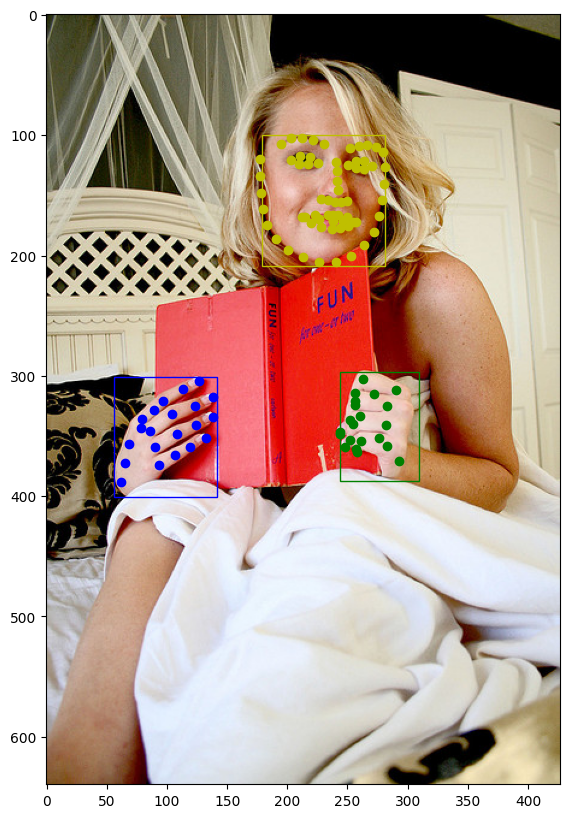

In [96]:
from matplotlib.patches import Rectangle
# other 11051
fig, ax = plt.subplots(1)
ax.imshow(I)
x, y, w, h = anns[0]['lefthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect)

points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'go')
    j = j + 3

x, y, w, h = anns[0]['righthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)
points = anns[0]['righthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'bo')
    j = j + 3

x, y, w, h = anns[0]['face_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='y', facecolor='none')
ax.add_patch(rect)
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'yo')
    j = j + 3


plt.show()

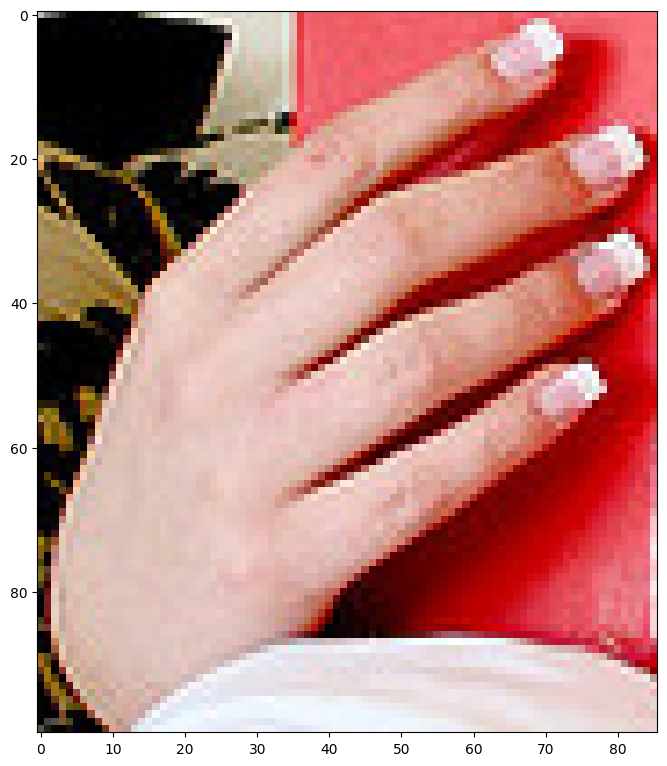

0.10041368752717972
0.06027253717184067
0.06027253717184067
0.052425965666770935
0.022495709359645844
0.552988588809967
0.5874093174934387
0.543851375579834
0.6360337138175964
0.5041778087615967
0.5802848935127258
0.5084354877471924
0.7325686812400818
0.5637552738189697
0.6405140161514282
0.595879077911377
0.6734267473220825
0.4924302101135254
0.6312934160232544
0.5915022492408752
0.6514066457748413


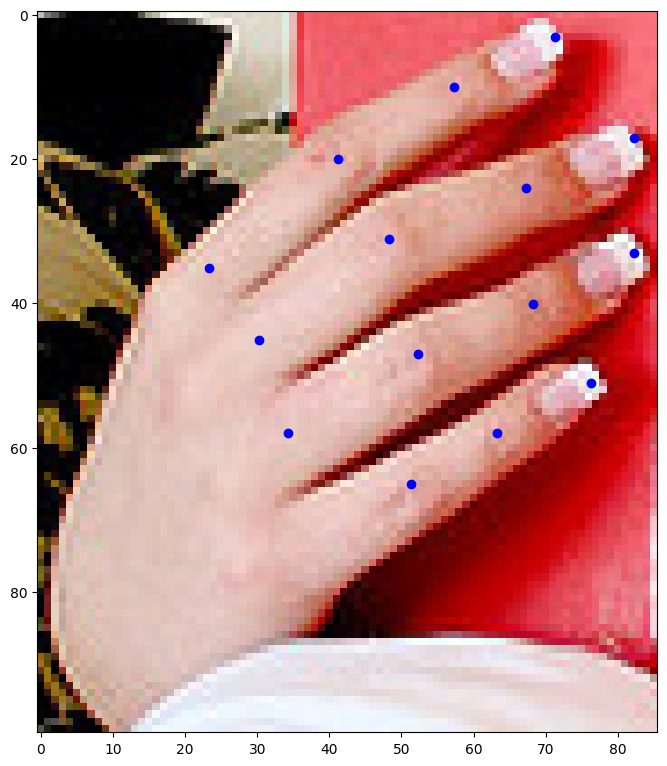

In [118]:
x, y, _w, _h = anns[0]['righthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['righthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.5:
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    print(points[j+2])
    j = j + 3
plt.show()

0.30090901255607605
0.4284001290798187
0.4489055871963501
0.11365842074155807
0.39725711941719055
0.5304413437843323
0.13021886348724365
0.1316894292831421
0.3646736145019531
0.5042027831077576
0.33326295018196106
0.2673744261264801
0.3320251405239105
0.5315167903900146
0.36446428298950195
0.20783263444900513


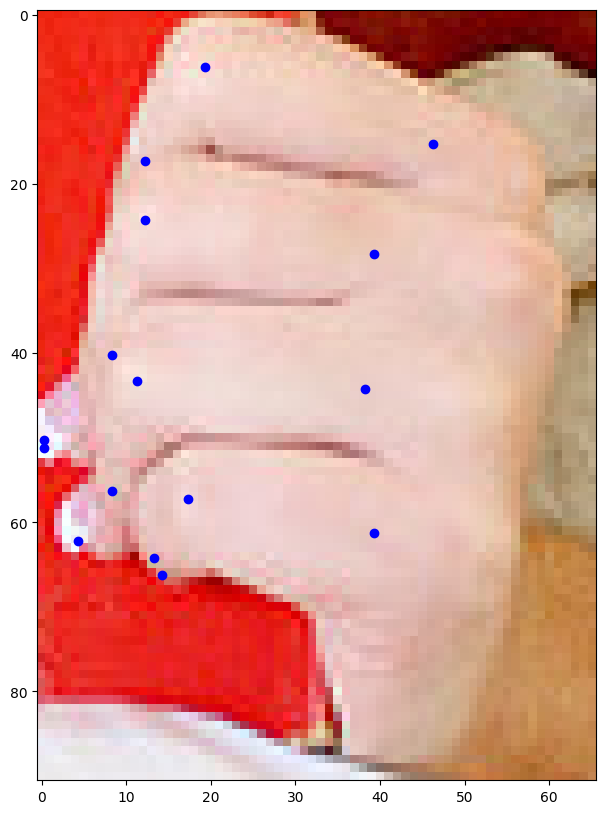

In [115]:
x, y, _w, _h = anns[0]['lefthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


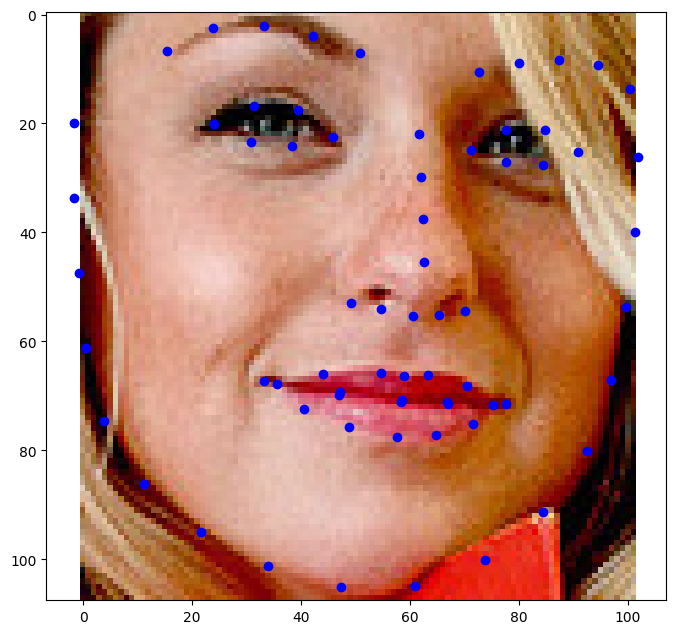

In [119]:
x, y, _w, _h = anns[0]['face_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()
